In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

# Reading Dataset
Data is taken from https://agmarknet.gov.in/

In [3]:
vegetables = pd.read_csv('Agmarknet.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Ahmednagar,Ahmednagar,Onion,Red,FAQ,500,14000,7500,16-Dec-19
1,2,Ahmednagar,Ahmednagar,Onion,Red,FAQ,3000,12500,9500,14-Dec-19
2,3,Ahmednagar,Ahmednagar,Onion,Red,FAQ,500,10000,5500,12-Dec-19
3,4,Ahmednagar,Ahmednagar,Onion,Red,FAQ,500,10000,6500,09-Dec-19
4,5,Ahmednagar,Ahmednagar,Onion,Other,FAQ,4000,10000,8000,09-Dec-19


In [4]:
vegetables.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [5]:
vegetables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12928 entries, 0 to 12927
Data columns (total 10 columns):
Sl no.                       12928 non-null int64
District Name                12928 non-null object
Market Name                  12928 non-null object
Commodity                    12928 non-null object
Variety                      12928 non-null object
Grade                        12928 non-null object
Min Price (Rs./Quintal)      12928 non-null int64
Max Price (Rs./Quintal)      12928 non-null int64
Modal Price (Rs./Quintal)    12928 non-null int64
Price Date                   12928 non-null object
dtypes: int64(4), object(6)
memory usage: 707.1+ KB


# Drop Unnecessary Colums

Sl no, Commodity, Grade are not  useful so drop it

In [6]:
vegetables = vegetables.drop(['Sl no.','Commodity','Grade'], axis = 1)
vegetables.head()

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Ahmednagar,Ahmednagar,Red,500,14000,7500,16-Dec-19
1,Ahmednagar,Ahmednagar,Red,3000,12500,9500,14-Dec-19
2,Ahmednagar,Ahmednagar,Red,500,10000,5500,12-Dec-19
3,Ahmednagar,Ahmednagar,Red,500,10000,6500,09-Dec-19
4,Ahmednagar,Ahmednagar,Other,4000,10000,8000,09-Dec-19


# Data Selection

First select District Name == Satara 
Then, Select Market Name == Karad

In [7]:
vegetables = vegetables[vegetables['District Name'] == "Satara"]
vegetables = vegetables[vegetables['Market Name'] == "Karad"]
vegetables.head()

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
3541,Satara,Karad,Other,2500,3800,3800,31-Oct-19
3542,Satara,Karad,Other,2500,3500,3500,23-Oct-19
3543,Satara,Karad,Other,3000,3500,3500,22-Oct-19
3544,Satara,Karad,Other,2500,3500,3500,20-Oct-19
3545,Satara,Karad,Other,2500,3200,3200,19-Oct-19


In [8]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
3550,Satara,Karad,Other,2500,3500,3500,13
3549,Satara,Karad,Other,2500,3200,3200,14
3548,Satara,Karad,Other,3000,3700,3700,15
3547,Satara,Karad,Other,2500,3700,3700,16
3546,Satara,Karad,Other,2500,3500,3500,17
3545,Satara,Karad,Other,2500,3200,3200,19
3544,Satara,Karad,Other,2500,3500,3500,20
3543,Satara,Karad,Other,3000,3500,3500,22
3542,Satara,Karad,Other,2500,3500,3500,23
3541,Satara,Karad,Other,2500,3800,3800,31


In [9]:
climate = pd.read_csv('climate_Karad_210.csv')
vegetables.reset_index(inplace=True)
#climate[['Temp_Avg', 'Dew_Avg','Humid_Avg', 'Wind_Avg', 'Pressure_Avg', 'Precipitation_Total']]
#vegetables[['Temp_Avg', 'Dew_Avg','Humid_Avg', 'Wind_Avg', 'Pressure_Avg', 'Precipitation_Total']] = climate[['Temp_Avg', 'Dew_Avg','Humid_Avg', 'Wind_Avg', 'Pressure_Avg', 'Precipitation_Total']]
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
#X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]

   index District Name Market Name Variety  Min Price (Rs./Quintal)  \
0   3774        Satara       Karad   Other                      500   
1   3773        Satara       Karad   Other                      500   
2   3772        Satara       Karad   Other                      700   
3   3771        Satara       Karad   Other                      500   
4   3770        Satara       Karad   Other                      500   

   Max Price (Rs./Quintal)  Modal Price (Rs./Quintal)  Price Date   Temp_Max  \
0                     1000                       1000           1  83.980952   
1                     1000                       1000           2  83.952381   
2                     1000                       1000           3  83.966667   
3                      900                        900           5  83.961905   
4                     1000                       1000           6  83.957143   

    Temp_Avg  ...    Dew_Avg    Dew_Min  Humid_Max  Humid_Avg  Humid_Min  \
0  74.290476  ..

In [10]:
data

,Price Date,Modal Price (Rs./Quintal),Temp_Max,Temp_Avg,Temp_Min,Dew_Max,Dew_Avg,Dew_Min,Humid_Max,Humid_Avg,Humid_Min,Wind_Max,Wind_Avg,Wind_Min,Pressure_Avg,Precipitation_Total
0,1,1000,83.980952,74.290476,65.519048,59.495238,64.147619,59.495238,91.200000,72.580952,49.142857,5.509524,1.585714,0.509524,27.419048,0.000000
1,2,1000,83.952381,74.209524,65.385714,59.676190,64.066667,59.676190,91.185714,72.552381,49.228571,5.495238,1.576190,0.500000,27.423810,0.000000
2,3,1000,83.966667,74.142857,65.257143,59.495238,63.933333,59.495238,91.214286,72.442857,48.966667,5.480952,1.566667,0.490476,27.428571,0.000000
3,5,900,83.961905,74.019048,65.023810,59.247619,63.714286,59.247619,91.176190,72.271429,48.600000,5.447619,1.542857,0.480952,27.438095,0.000000
4,6,1000,83.957143,73.947619,64.914286,59.119048,63.600000,59.119048,91.214286,72.185714,48.409524,5.423810,1.528571,0.471429,27.442857,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,19,3200,89.414286,79.666667,70.233333,60.995238,65.819048,60.995238,84.414286,67.804762,48.042857,6.276190,1.866667,0.357143,27.314286,0.042857
230,20,3500,89.280952,79.604762,70.257143,61.142857,65.923810,61.142857,84.552381,68.104762,48.433333,6.261905,1.861905,0.357143,27.314286,0.047619
231,22,3500,89.104762,79.495238,70.261905,61.361905,66.114286,61.361905,84.952381,68.628571,48.947619,6.257143,1.861905,0.357143,27.309524,0.052381
232,23,3500,89.009524,79.452381,70.280952,61.495238,66.185714,61.495238,85.061905,68.823810,49.204762,6.233333,1.852381,0.357143,27.304762,0.052381


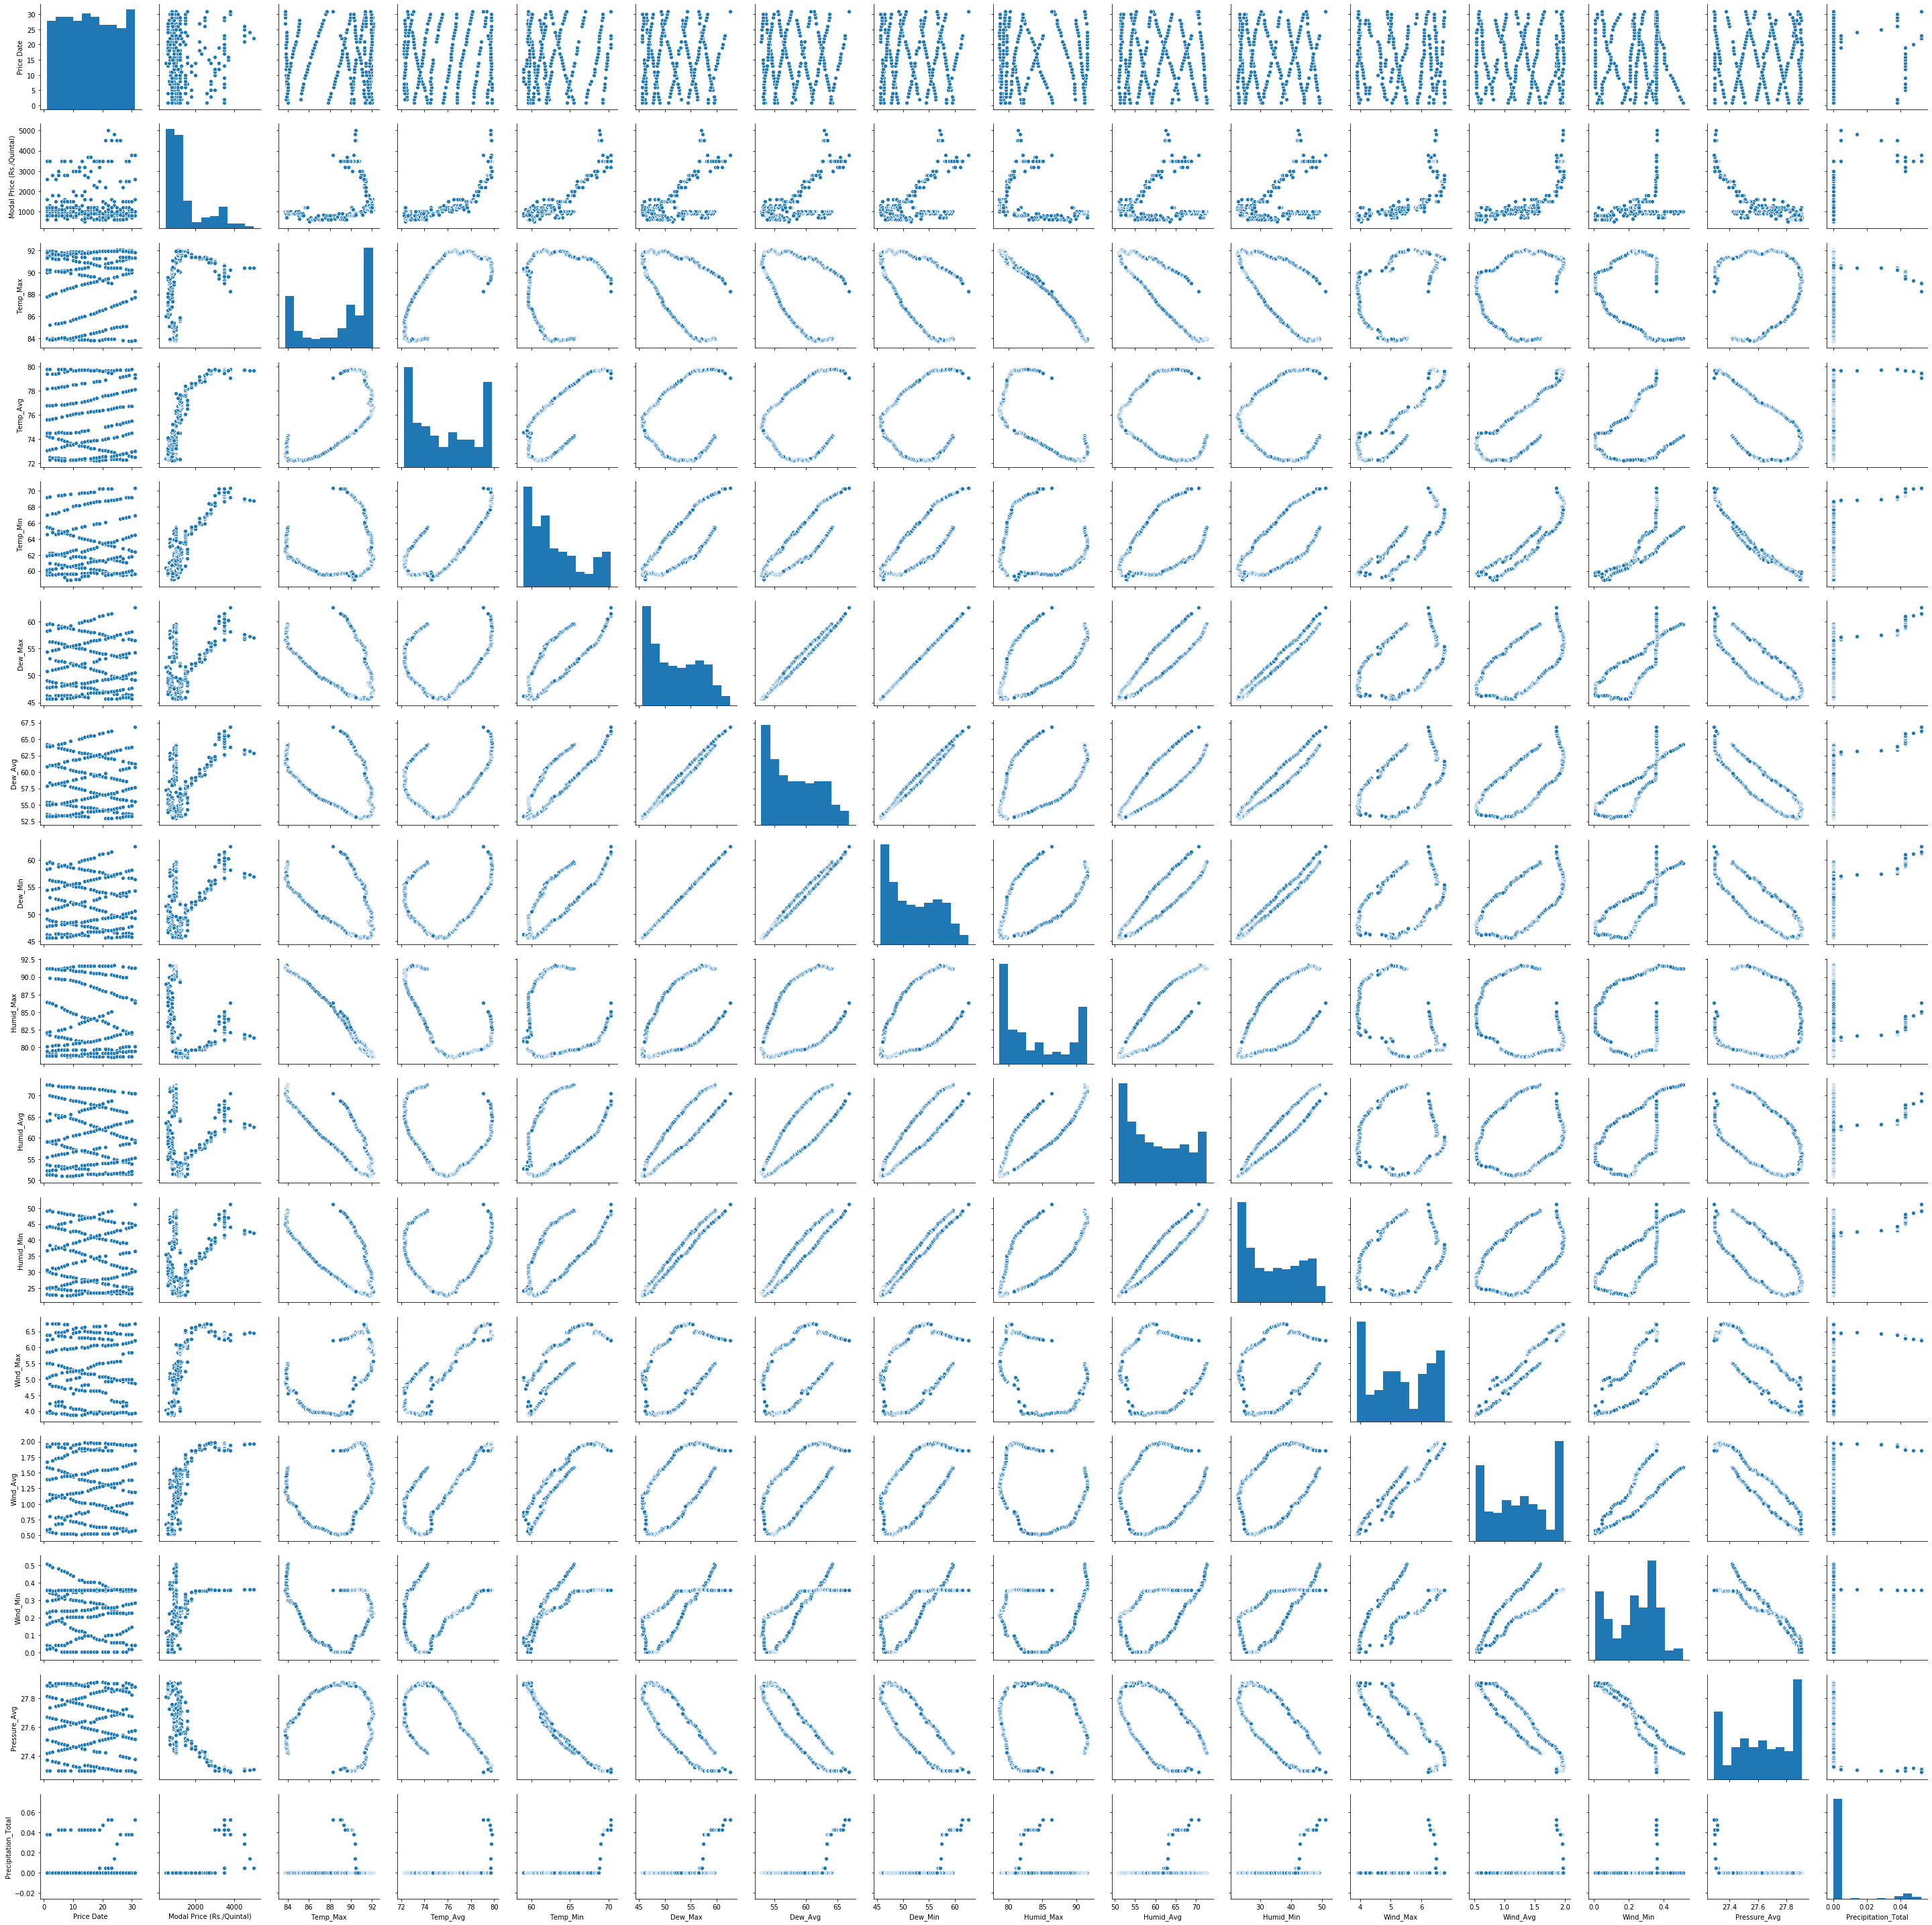

In [11]:
sns.pairplot(data)

In [12]:
#sns.lmplot(x='Price Date', y = 'Min Price (Rs./Quintal)', data = vegetables)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [15]:
#200, 300, mse, split=5
regr = RandomForestRegressor(n_estimators = 140,max_depth=300, random_state=42, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
#from sklearn.svm import SVR
#regr = SVR(C=2e3, epsilon=0.1)
#regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=300, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [16]:
predicted = regr.predict(X_test)
#print(np.reshape(predicted,(len(y_test),1)), np.reshape(y_test,(len(y_test),1)))
print(np.reshape(predicted,(len(y_test),1))- np.reshape(y_test,(len(y_test),1)))

     Modal Price (Rs./Quintal)
69                   69.285714
206                  -7.857143
180                -232.142857
9                   -25.714286
127                -192.142857
..                         ...
113                 -91.428571
68                   66.071429
75                 -106.428571
29                  -63.571429
114                 -91.785714

[71 rows x 1 columns]


In [17]:
pred = np.reshape(regr.predict(X_train), (len(y_train), 1))
out = np.reshape(np.array(y_train), (len(y_train), 1))
regr.score(X_train, y_train)
#[str(pred[i]) +"->" +str(out[i]) for i in range(len(y_train))]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 15 columns):
Price Date             234 non-null int64
Temp_Max               234 non-null float64
Temp_Avg               234 non-null float64
Temp_Min               234 non-null float64
Dew_Max                234 non-null float64
Dew_Avg                234 non-null float64
Dew_Min                234 non-null float64
Humid_Max              234 non-null float64
Humid_Avg              234 non-null float64
Humid_Min              234 non-null float64
Wind_Max               234 non-null float64
Wind_Avg               234 non-null float64
Wind_Min               234 non-null float64
Pressure_Avg           234 non-null float64
Precipitation_Total    234 non-null float64
dtypes: float64(14), int64(1)
memory usage: 27.5 KB


In [18]:
from sklearn.metrics import *
#regr.score(np.reshape(predicted, (len(y_test), 1)), np.reshape(np.array(y_test), (len(y_test), 1)))

In [19]:
print(mean_squared_error(np.reshape(predicted, (len(y_test), 1)), np.reshape(np.array(y_test), (len(y_test), 1))))
print(math.sqrt(mean_squared_error(np.reshape(predicted, (len(y_test), 1)), np.reshape(np.array(y_test), (len(y_test), 1)))))

24954.710405288875
157.97059981303127


In [20]:
predicted = np.reshape(predicted,(len(y_test),1))
output = np.reshape(np.array(y_test),(len(y_test),1))
print([str(predicted[i]) +"->" +str(output[i]) for i in range(len(y_test))])
print(regr.score(X_test,y_test))

['[669.28571429]->[600]', '[3492.14285714]->[3500]', '[1767.85714286]->[2000]', '[974.28571429]->[1000]', '[1307.85714286]->[1500]', '[863.57142857]->[900]', '[2674.28571429]->[2800]', '[769.64285714]->[600]', '[4111.42857143]->[4500]', '[960.71428571]->[700]', '[3373.57142857]->[3500]', '[1153.92857143]->[1200]', '[3572.14285714]->[3700]', '[945.]->[1000]', '[2995.]->[3000]', '[1257.14285714]->[1200]', '[745.71428571]->[800]', '[897.14285714]->[1000]', '[3545.]->[3200]', '[997.85714286]->[1000]', '[4426.42857143]->[4500]', '[952.14285714]->[1000]', '[856.42857143]->[800]', '[1147.14285714]->[1200]', '[3249.28571429]->[3500]', '[993.57142857]->[900]', '[716.07142857]->[700]', '[1897.85714286]->[2000]', '[747.85714286]->[900]', '[939.28571429]->[800]', '[1243.57142857]->[1200]', '[654.64285714]->[800]', '[925.]->[800]', '[1233.57142857]->[1600]', '[1284.28571429]->[1100]', '[1407.14285714]->[1500]', '[1277.85714286]->[1300]', '[845.]->[700]', '[1392.14285714]->[1300]', '[1670.71428571]-

In [21]:
#y_train
print("Avg_error=" + str(sum(abs(predicted - output))[0]/len(y_test)))
print(len(y_test))

Avg_error=124.53722334004024
71


In [22]:
print("DecisionTreeRegressor",regr.base_estimator_)
#print("list of DecisionTreeRegressor",regr.estimators_)
print("feature importances")
print("______________________________________________________")
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a.tolist()

DecisionTreeRegressor DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
feature importances
______________________________________________________


[[0.030599360554637783],
 [0.0573396406675827],
 [0.317436707740814],
 [0.17536990909365546],
 [0.02192533356866073],
 [0.02237375043894359],
 [0.021168667602563213],
 [0.04088822643983455],
 [0.024780234928051224],
 [0.023184608781621274],
 [0.06284634244045584],
 [0.10521308812868815],
 [0.006973102064218237],
 [0.08296208130992715],
 [0.00693894624034628]]

# Create Pickle file

In [25]:
import pickle
filename = 'Karad_Onion'
outfile = open(filename,'wb')
pickle.dump(regr,outfile)
outfile.close()

In [56]:
filename = 'Karad_Onion'
with open(filename, "rb") as f:
    rf = pickle.load(f)
predicted = rf.predict(X)
actual= np.reshape(np.array(y),(len(y),))
#print(predicted,actual)
sum = 0
for i in range(len(predicted)):
    #print(str(actual[i]) + "->" + str(predicted[i]))
    sum = sum +abs(actual[i] - predicted[i])
f.close()

# Total Error

In [57]:
print(sum/len(actual)) 

74.36507936507935
